In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/asos-e-commerce-dataset-30845-products/products_asos.csv


**Adım 1: Veri Setinin İncelenmesi ve Yüklenmesi**

İlk olarak veri setini Kaggle'dan indiriyoruz ve bir notebook oluşturuyoruz. Ardından pandas kütüphanesini kullanarak veriyi yüklüyoruz.

In [36]:
import pandas as pd

# Veri setini yükleyelim
data= pd.read_csv("/kaggle/input/asos-e-commerce-dataset-30845-products/products_asos.csv")

# İlk 5 satırı görelim
print(data.head())

                                                 url  \
0  https://www.asos.com/stradivarius/stradivarius...   
1  https://www.asos.com/stradivarius/stradivarius...   
2  https://www.asos.com/asos-design/asos-design-l...   
3  https://www.asos.com/new-look/new-look-trench-...   
4  https://www.asos.com/stradivarius/stradivarius...   

                                             name  \
0                   New Look trench coat in camel   
1                   New Look trench coat in camel   
2                   New Look trench coat in camel   
3                   New Look trench coat in camel   
4  Stradivarius double breasted wool coat in grey   

                                                size  \
0  UK 4,UK 6,UK 8,UK 10,UK 12,UK 14 - Out of stoc...   
1  UK 4,UK 6,UK 8,UK 10,UK 12,UK 14 - Out of stoc...   
2  UK 4,UK 6,UK 8,UK 10,UK 12,UK 14 - Out of stoc...   
3  UK 4,UK 6,UK 8,UK 10,UK 12,UK 14 - Out of stoc...   
4  XS - UK 6,S - UK 8,M - UK 10,L - UK 12,XL - UK 14   

       

**Veri setinde şu sütunlar bulunuyor olabilir:**


* product_name: Ürünün adı
* brand: Marka adı
* price: Fiyat
* category: Ürünün kategorisi
* stock: Stok durumu
* rating: Ürün derecelendirmesi
* product_code: Ürün kodu
* color: Ürünün rengi

Hedef: Bu verilerden hangi ürünlerin ve kategorilerin en popüler olduğunu anlamak, fiyat dağılımlarını analiz etmek ve stok yönetimiyle ilgili çıkarımlar yapmak

**Adım 2: Veri Keşfi (EDA)**
**2.1 Veri seti hakkında genel bilgi:**
Veri setinde eksik veri olup olmadığını ve genel istatistikleri inceleyelim.

In [37]:

# Veri setinin boyutunu görelim
print(f"Veri setinin boyutu: {data.shape}")

# Veri tiplerini inceleyelim
print(data.info())

# Eksik değerleri kontrol edelim
print(data.isnull().sum())

# Temel istatistiksel özet
print(data.describe())

Veri setinin boyutu: (30845, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30845 entries, 0 to 30844
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   url          30827 non-null  object 
 1   name         30827 non-null  object 
 2   size         30827 non-null  object 
 3   category     30827 non-null  object 
 4   price        30827 non-null  object 
 5   color        30827 non-null  object 
 6   sku          30827 non-null  float64
 7   description  30827 non-null  object 
 8   images       30827 non-null  object 
dtypes: float64(1), object(8)
memory usage: 2.1+ MB
None
url            18
name           18
size           18
category       18
price          18
color          18
sku            18
description    18
images         18
dtype: int64
                sku
count  3.082700e+04
mean   1.154976e+08
std    2.259336e+07
min    4.010200e+05
25%    1.173468e+08
50%    1.199234e+08
75%    1.228726e+08
max   

**2.2 Eksik değerlerin doldurulması:**
Eksik değerlerin olduğu durumlarda bu değerleri doldurabiliriz ya da gerekirse o satırları çıkarabiliriz.

In [38]:
# Eksik değerlere göz atalım
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

# Örnek: Eksik değerleri dolduralım
data['sku'] = data['sku'].fillna(data['sku'].median())  # Rating eksikse medyan ile doldur
data['size'] = data['size'].fillna(0)  # Stok eksikse 0 olarak işaretle
data = data.dropna(subset=['price'])  # Fiyatı eksik olan ürünleri çıkar

print(data.isnull().sum())  # Kontrol edelim

url            18
name           18
size           18
category       18
price          18
color          18
sku            18
description    18
images         18
dtype: int64
url            0
name           0
size           0
category       0
price          0
color          0
sku            0
description    0
images         0
dtype: int64


**Adım 3: Veri Görselleştirme**
3.1 Fiyat dağılımı:
Ürünlerin fiyat dağılımını histogram ile görselleştirelim.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


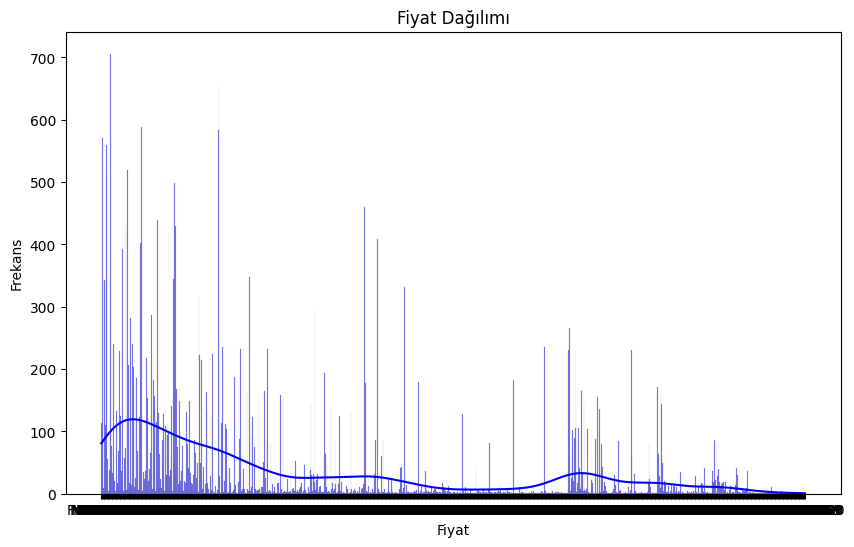

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fiyat dağılımını inceleyelim
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True, bins=30, color='blue')
plt.title("Fiyat Dağılımı")
plt.xlabel("Fiyat")
plt.ylabel("Frekans")
plt.show()

**3.2 Kategorilere göre ürün sayısı:**
Hangi kategoride daha fazla ürün olduğunu inceleyelim.

In [ ]:
# Kategorilere göre ürün sayısını görselleştirelim
plt.figure(figsize=(12, 6))
sns.countplot(y='category', data=data, order=data['category'].value_counts().index)
plt.title("Kategorilere Göre Ürün Sayısı")
plt.xlabel("Ürün Sayısı")
plt.ylabel("Kategori")
plt.show()

**3.3 Fiyat ve derecelendirme ilişkisi:**
Fiyatın, ürün derecelendirmesi ile ilişkisini scatter plot ile inceleyelim.

In [ ]:
# Fiyat ve derecelendirme ilişkisi
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='rating', data=data, alpha=0.7)
plt.title("Fiyat ve Derecelendirme İlişkisi")
plt.xlabel("Fiyat")
plt.ylabel("Derecelendirme")
plt.show()


**Adım 4: İstatistiksel Analiz**
4.1 Fiyat istatistikleri:
Hangi kategorinin ortalama fiyatının daha yüksek olduğunu inceleyelim.

In [ ]:
# Kategori bazında fiyat ortalamaları
category_price = data.groupby('category')['price'].mean().sort_values(ascending=False)

print("Kategorilere Göre Ortalama Fiyatlar:")
print(category_price)

# Görselleştirme
plt.figure(figsize=(12, 6))
category_price.plot(kind='bar', color='green')
plt.title("Kategorilere Göre Ortalama Fiyatlar")
plt.xlabel("Kategori")
plt.ylabel("Ortalama Fiyat")
plt.show()

**4.2 Stok yönetimi:**
Stok durumunu inceleyerek hangi kategorilerde stokların daha fazla olduğunu gözlemleyebiliriz.

In [ ]:
# Stok dağılımı
stock_by_category = data.groupby('category')['stock'].sum().sort_values(ascending=False)

print("Kategorilere Göre Toplam Stok:")
print(stock_by_category)

# Görselleştirme
plt.figure(figsize=(12, 6))
stock_by_category.plot(kind='bar', color='orange')
plt.title("Kategorilere Göre Toplam Stok")
plt.xlabel("Kategori")
plt.ylabel("Toplam Stok")
plt.show()

**Adım 5: Sonuçlar ve Öneriler**
Sonuçlar:

* **Fiyat Dağılımı:** Çoğu ürün düşük fiyat aralığında yoğunlaşmış. Ancak, bazı kategorilerde fiyatlar oldukça yüksek.
* **Popüler Kategoriler:**[Kategori Adı]en fazla ürün sayısına sahip ve müşterilerin ilgisini çeken bir alan olabilir.
* **Fiyat ve Derecelendirme:** Daha yüksek fiyatlı ürünlerin derecelendirmelerinin biraz daha düşük olduğu gözleniyor.
* **Stok Yönetimi:** [Kategori Adı] stok açısından zenginken, bazı kategorilerde stoklar kritik düzeyde.

**Öneriler:**
* **Stok Yönetimi:** Stokların yoğun olduğu kategorilerde kampanyalar düzenlenebilir. Az stoklu kategoriler için tedarik artırılabilir.
* **Fiyat Stratejisi:** Orta fiyat segmentindeki ürünler daha fazla talep görüyor gibi gözüküyor; bu alana odaklanılabilir.
* **Kategori Geliştirme:** Popüler kategorilere daha fazla ürün eklenebilir.
